In [ ]:
#Packages
!pip install BeautifulSoup4
!pip install lxml
!pip install html5lib
!pip install nltk==3.2.5
!pip install pdfplumber
!pip install -U spacy
!python -m spacy download en
!pip install yfinance

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 14.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for nltk: filename=nltk-3.2.5-py3-none-any.whl size=1392143 sha256=d7d92a075227646781ce9070985ea2a1e0c124476609968bfc65233b78b61cc8
  Stored in directory: /root/.cache/pip/wheels/50/d6/35/4a8a48ea9fe03abae30da7971b8ed2a350436bebc00541372b
Successfully built nltk
  Attempting uninstall: nltk
    Found existing installation: nltk 3.8.1
    Uninstalling nltk-3.8.1:
      Successfully uninstalled nltk-3.8.1
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.4/56.4 kB 2.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 52.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 111.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 48.9 MB/s eta 0:00:00
  Attempting uninstall: spacy
    Found existing installation: spacy 3.7.4
    Uninstalling spacy-3.7.4:
      Successfully uninstalled spa

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import nltk
nltk.download('stopwords')
nltk.download('punkt')
from collections import Counter
from nltk.corpus import stopwords
import spacy
from html import unescape
import pdfplumber
from datetime import datetime
import datetime as dt

import urllib
import urllib.request
from bs4 import BeautifulSoup
from bs4 import re
import requests
import re
import yfinance as yf
from statsmodels.tsa.stattools import adfuller
from google.colab import files

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
from nltk.tokenize import word_tokenize

#Modelul SpaCy
nlp = spacy.load("en_core_web_sm")

# Adaugare stop words la cele de la SpaCy
all_stopwords = nlp.Defaults.stop_words
custom_stopwords = {'the', 'is', 'th', 's', 'm', 'would'}
all_stopwords |= custom_stopwords

# Tokenizare cu NLTK si eliminare de stopwords cu SpaCy
def tokenize_and_remove_stopwords(text):

    word_tokens = word_tokenize(text)

    filtered_sentence = [word for word in word_tokens if word.lower() not in all_stopwords]
    return filtered_sentence

#Test
text = "This is an example sentence demonstrating the use of spaCy and NLTK."
filtered_text = tokenize_and_remove_stopwords(text)
print(filtered_text)

['example', 'sentence', 'demonstrating', 'use', 'spaCy', 'NLTK', '.']


In [ ]:
def my_preprocessor(doc):
  return(unescape(doc).lower())

In [ ]:
def my_tokenizer(doc):

    text = word_tokenize(doc)
    tokens_without_sw= [word for word in text if not word in all_stopwords]

    return tokens_without_sw

In [ ]:
def preprocess_tokens(tokens):
  '''
  Remove any extra lines, non-letter characters, and blank quotes
  '''
  remove_new_lines = [re.sub('\s+', '', token) for token in tokens]
  #Non letter characters - eliminare
  non_letters = [re.sub('[^a-zA-Z]', '', remove_new_line) for remove_new_line in remove_new_lines]
  #Sistracting single quotes - eliminare
  remove_quotes = [re.sub("\'", '', non_letter) for non_letter in non_letters]
  #Empty strings from a list of strings - eliminare
  final = list(filter(None, remove_quotes))

  return final

In [ ]:
def concat_text(text):
    x=''
    for i in text:
        x = x+i
    return x

In [ ]:
def get_text(path):
  docs = []
  with pdfplumber.open(path) as pdf:
    for i in range(len(pdf.pages)):
      page = pdf.pages[i]
      text = page.extract_text()
      docs.append(text)
    concat = concat_text(docs)
  return concat

In [ ]:
def get_text(path):  #file is the path
  docs = []
  with pdfplumber.open(path) as pdf:
    for i in range(len(pdf.pages)):
      page = pdf.pages[i]
      text = page.extract_text()
      docs.append(text)
    concat = concat_text(docs)
  return concat

In [ ]:
def get_words(full_text):

  raw = [word.lower() for word in full_text.split()]

  values = ','.join(map(str, raw))  #converts bytes object to string
  tokenizer = my_tokenizer(values)

  words = preprocess_tokens(tokenizer)
  # remove stopwords
  stops = nltk.corpus.stopwords.words('english')
  new_stopwords = ['chairman','would', 'mr']
  stops.extend(new_stopwords)
  words = [word for word in words if word not in stops]
  counter = Counter()
  counter.update(words)
  most_common = counter.most_common(25)

  return words, most_common

In [ ]:
path_to_local_pdf = True

if path_to_local_pdf or path_to_local_txt:
    base_directory = "/content/drive/MyDrive/Colab Notebooks/Projects/FOMC_NLP/feddata/"

In [ ]:
link1 = '/content/drive/MyDrive/Colab Notebooks/Projects/FOMC_NLP/feddata/2000/FOMC20000201meeting.pdf'
link2 = '/content/drive/MyDrive/Colab Notebooks/Projects/FOMC_NLP/feddata/1980/FOMC19800109meeting.pdf'
link3 = '/content/drive/MyDrive/Colab Notebooks/Projects/FOMC_NLP/feddata/1982/FOMC19820701meeting.pdf'

text = (get_text(link3))

len(text)

6382

In [ ]:
import pandas as pd

# Path to the CSV file on your local machine or cloud storage
data_path = '/content/drive/MyDrive/Colab Notebooks/Projects/FOMC_NLP/fomc_transcript_tokens_from_1972.csv'

# Load the data
data = pd.read_csv(data_path, parse_dates=['Date'], index_col='Date')

# Display the first 10 rows of the Date column
print(data.index[:10])


DatetimeIndex(['1972-01-11', '1972-03-21', '1972-05-23', '1972-06-20',
               '1972-08-15', '1972-09-19', '1972-10-17', '1972-12-19',
               '1973-01-16', '1973-03-20'],
              dtype='datetime64[ns]', name='Date', freq=None)


In [ ]:
print(data.index[:10])

DatetimeIndex(['1972-01-11', '1972-03-21', '1972-05-23', '1972-06-20',
               '1972-08-15', '1972-09-19', '1972-10-17', '1972-12-19',
               '1973-01-16', '1973-03-20'],
              dtype='datetime64[ns]', name='Date', freq=None)


In [ ]:
# Count the number of rows
row_count = data.shape[0]

# Display the row count
print(f'The number of rows in the data set is: {row_count}')

The number of rows in the data set is: 447


In [ ]:
import pandas as pd

# Assuming Data is already loaded and contains the 'top_tokens' column

# Create a DataFrame to store word counts
word_df = pd.DataFrame(columns=['Words', 'Count'])

for i in range(len(data)):  # total links
    word_count = {'Words': [], 'Count': []}
    top_tokens = data['top_tokens'][i]

    # Check if top_tokens is a string that needs conversion
    if isinstance(top_tokens, str):
        # Attempt to safely convert string to list of tuples
        import ast
        try:
            top_tokens = ast.literal_eval(top_tokens)
        except (ValueError, SyntaxError):
            print(f"Skipping invalid top_tokens at index {i}: {top_tokens}")
            continue

    # Process each set of top tokens
    for sets in top_tokens:
        print(f"Processing: {sets}")  # Debug print
        if isinstance(sets, (list, tuple)) and len(sets) == 2:
            word_count['Words'].append(sets[0])  # total words broken out
            word_count['Count'].append(sets[1])  # total count per word
        else:
            print(f"Skipping invalid sets at index {i}: {sets}")

    word_df1 = pd.DataFrame(word_count)
    word_df = pd.concat([word_df, word_df1], ignore_index=True)

# Group by words and sum the counts
total_words = word_df.groupby(['Words']).sum()

# Sort by count in descending order and get the top 25 words
sorted_top_words = total_words.sort_values(by='Count', ascending=False).head(25)

print(sorted_top_words)


Streaming output truncated to the last 5000 lines.
Processing: ('federal', 38)
Processing: ('open', 30)
Processing: ('members', 29)
Processing: ('markets', 27)
Processing: ('growth', 27)
Processing: ('inflation', 27)
Processing: ('prices', 27)
Processing: ('period', 25)
Processing: ('economic', 25)
Processing: ('reserve', 24)
Processing: ('recent', 23)
Processing: ('year', 22)
Processing: ('quarter', 22)
Processing: ('transactions', 21)
Processing: ('months', 21)
Processing: ('meeting', 20)
Processing: ('july', 19)
Processing: ('new', 18)
Processing: ('operations', 18)
Processing: ('system', 17)
Processing: ('securities', 17)
Processing: ('agreements', 17)
Processing: ('remained', 17)
Processing: ('committee', 32)
Processing: ('inflation', 28)
Processing: ('prices', 26)
Processing: ('members', 22)
Processing: ('growth', 22)
Processing: ('period', 20)
Processing: ('year', 20)
Processing: ('market', 18)
Processing: ('meeting', 17)
Processing: ('markets', 17)
Processing: ('continued', 17)

In [ ]:
print(data.columns)

Index(['Transcript', 'all_words', 'top_tokens'], dtype='object')


In [ ]:
pip install nltk

In [ ]:
import nltk
from nltk.corpus import opinion_lexicon
nltk.download('opinion_lexicon')

[nltk_data] Downloading package opinion_lexicon to /root/nltk_data...
[nltk_data]   Unzipping corpora/opinion_lexicon.zip.


True

In [ ]:
import pandas as pd
import re
from nltk.corpus import opinion_lexicon

word_list = {
    'Positive': list(opinion_lexicon.positive()),
    'Negative': list(opinion_lexicon.negative())
}

negate = ["aint", "arent", "cannot", "cant", "couldnt", "darent", "didnt", "doesnt", "ain't", "aren't", "can't",
          "couldn't", "daren't", "didn't", "doesn't", "dont", "hadnt", "hasnt", "havent", "isnt", "mightnt", "mustnt",
          "neither", "don't", "hadn't", "hasn't", "haven't", "isn't", "mightn't", "mustn't", "neednt", "needn't",
          "never", "none", "nope", "nor", "not", "nothing", "nowhere", "oughtnt", "shant", "shouldnt", "wasnt",
          "werent", "oughtn't", "shan't", "shouldn't", "wasn't", "weren't", "without", "wont", "wouldnt", "won't",
          "wouldn't", "rarely", "seldom", "despite", "no", "nobody"]

def negated(word):
    """Determine if preceding word is a negation word"""
    return word.lower() in negate

def count_with_negation(fin_dict, transcript):
    """Count positive and negative words with negation check"""
    pos_count = 0
    neg_count = 0
    pos_words = []
    neg_words = []
    input_words = re.findall(r'\b([a-zA-Z]+n\'t|[a-zA-Z]+\'s|[a-zA-Z]+)\b', transcript.lower())
    word_count = len(input_words)
    for i in range(0, word_count):
        if input_words[i] in fin_dict['Negative']:
            neg_count += 1
            neg_words.append(input_words[i])
        if input_words[i] in fin_dict['Positive']:
            if i >= 3:
                if negated(input_words[i - 1]) or negated(input_words[i - 2]) or negated(input_words[i - 3]):
                    neg_count += 1
                    neg_words.append(input_words[i] + ' (with negation)')
                else:
                    pos_count += 1
                    pos_words.append(input_words[i])
            elif i == 2:
                if negated(input_words[i - 1]) or negated(input_words[i - 2]):
                    neg_count += 1
                    neg_words.append(input_words[i] + ' (with negation)')
                else:
                    pos_count += 1
                    pos_words.append(input_words[i])
            elif i == 1:
                if negated(input_words[i - 1]):
                    neg_count += 1
                    neg_words.append(input_words[i] + ' (with negation)')
                else:
                    pos_count += 1
                    pos_words.append(input_words[i])
            elif i == 0:
                pos_count += 1
                pos_words.append(input_words[i])
    results = [word_count, pos_count, neg_count, pos_words, neg_words]
    return results

temp = [count_with_negation(word_list, x) for x in data.Transcript]
temp = pd.DataFrame(temp)
data['wordcount'] = temp.iloc[:, 0].values
data['NPositiveWords'] = temp.iloc[:, 1].values
data['NNegativeWords'] = temp.iloc[:, 2].values
data['Poswords'] = temp.iloc[:, 3].values
data['Negwords'] = temp.iloc[:, 4].values

temp.head()


,0,1,2,3,4
0,812,6,11,"[permissible, modest, consistent, sustainable,...","[burns, vice, miss, vice, craven, vice, vice, ..."
1,4508,48,57,"[qualified, qualify, pleasure, satisfactory, s...","[burns, vice, miss, vice, vice, vice, vice, bu..."
2,895,16,15,"[respect, respect, maturity, maturity, faster,...","[burns, vice, miss, vice, craven, vice, vice, ..."
3,1021,9,10,"[faster, advanced, savings, well, outstanding,...","[burns, miss, miss, vice, craven, vice, vice, ..."
4,832,10,18,"[respect, rapid, rapid, quiet, rapid, savings,...","[burns, vice, vice, craven, vice, vice, vice, ..."


In [ ]:
# Display the last 10 rows of the Data DataFrame
data.tail(10)

,Transcript,all_words,top_tokens,wordcount,NPositiveWords,NNegativeWords,Poswords,Negwords
Date,,,,,,,,
2023-03-22,______________________________________________...,"['page', 'minutes', 'federal', 'open', 'market...","[('inflation', 84), ('board', 71), ('participa...",7711,164,147,"[effective, stability, stability, good, resili...","[vice, vice, vice, vice, burns, vice, vice, bu..."
2023-05-03,______________________________________________...,"['page', 'minutes', 'federal', 'open', 'market...","[('inflation', 78), ('board', 76), ('participa...",8507,187,206,"[stability, lead, stability, eased, smoothly, ...","[vice, vice, vice, bump, vice, vice, vice, vic..."
2023-06-14,______________________________________________...,"['page', 'minutes', 'federal', 'open', 'market...","[('inflation', 82), ('board', 69), ('participa...",7300,157,141,"[stability, stability, sensitive, maturity, he...","[vice, burns, vice, vice, vice, vice, vice, vi..."
2023-07-26,______________________________________________...,"['page', 'minutes', 'federal', 'open', 'market...","[('inflation', 69), ('board', 67), ('federal',...",7165,167,132,"[stability, stability, easing, robust, softer,...","[vice, vice, vice, vice, vice, vice, vice, vic..."
2023-09-20,_ ____________________________________________...,"['page', 'minutes', 'federal', 'open', 'market...","[('board', 66), ('participants', 61), ('inflat...",6827,155,137,"[stability, stability, sensitive, appreciated,...","[vice, vice, vice, vice, vice, vice, vice, vic..."
2023-11-01,______________________________________________...,"['page', 'minutes', 'federal', 'open', 'market...","[('board', 69), ('inflation', 61), ('participa...",7148,148,133,"[stability, stability, stability, well, strong...","[vice, vice, vice, vice, vice, vice, vice, vic..."
2023-12-13,_ ____________________________________________...,"['page', 'minutes', 'federal', 'open', 'market...","[('inflation', 71), ('board', 61), ('participa...",7096,173,139,"[stability, stability, eased, supported, notab...","[vice, vice, vice, burns, vice, vice, vice, de..."
2024-01-31,______________________________________________...,"['page', 'minutes', 'federal', 'open', 'market...","[('federal', 70), ('participants', 69), ('boar...",7790,192,158,"[stability, stability, pleasure, satisfactory,...","[vice, vice, vice, vice, vice, vice, vice, vic..."
2024-03-20,______________________________________________...,"['page', 'minutes', 'federal', 'open', 'market...","[('board', 74), ('rate', 62), ('participants',...",7562,195,145,"[stability, stability, eased, strong, gains, r...","[vice, vice, vice, vice, vice, slow, vice, vic..."


In [ ]:
Data = data

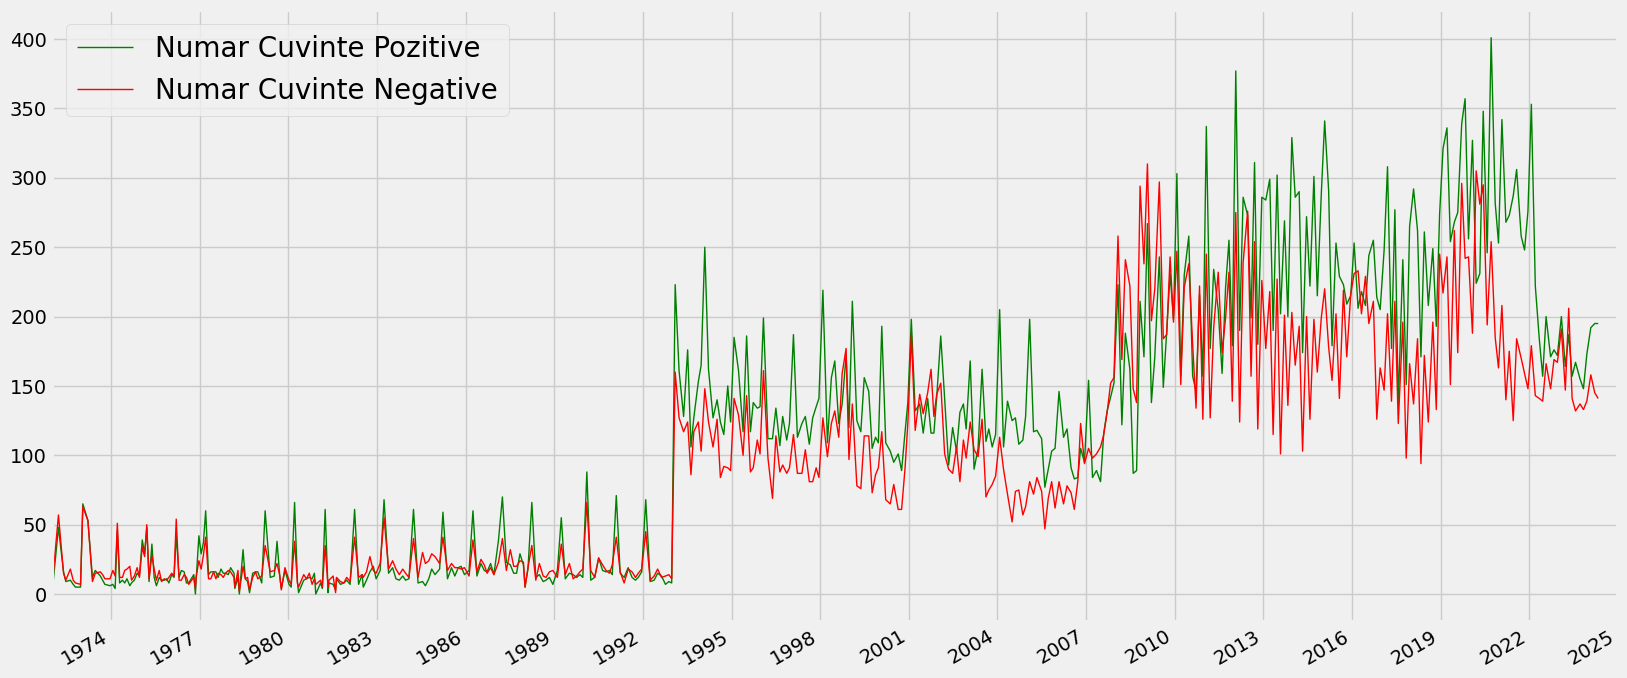

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.dates as mdates

# Assuming the date information is in the index and not in a column
# If the index contains the dates, let's reset the index to access the date
Data.reset_index(inplace=True)

# Rename the first column to 'Date' if necessary
Data.rename(columns={'index': 'Date'}, inplace=True)

# Ensure that the 'Date' column is in datetime format
Data['Date'] = pd.to_datetime(Data['Date'], errors='coerce')

# Remove rows with invalid dates if any
Data = Data.dropna(subset=['Date'])

# Set the 'Date' column as the index
Data.set_index('Date', inplace=True)

# Plotting
plt.rcParams["figure.figsize"] = (18, 9)
plt.style.use('fivethirtyeight')

fig, ax = plt.subplots()

ax.plot(Data.index, Data['NPositiveWords'], c='green', linewidth=1.0)
ax.plot(Data.index, Data['NNegativeWords'], c='red', linewidth=1.0)

plt.legend(['Numar Cuvinte Pozitive', 'Numar Cuvinte Negative'], prop={'size': 20}, loc=2)

# Format the ticks
years = mdates.YearLocator(3)   # every 3 years
months = mdates.MonthLocator()  # every month
years_fmt = mdates.DateFormatter('%Y')

ax.xaxis.set_major_locator(years)
ax.xaxis.set_major_formatter(years_fmt)
ax.xaxis.set_minor_locator(months)

datemin = np.datetime64(Data.index[0], 'Y')
datemax = np.datetime64(Data.index[-1], 'Y') + np.timedelta64(1, 'Y')
ax.set_xlim(datemin, datemax)

# Rotate and align the tick labels so they look better
fig.autofmt_xdate()

# Format the coords message box
ax.format_xdata = mdates.DateFormatter('%Y-%m-%d')
ax.grid(True)

plt.savefig('fomc_correlated_words.png', dpi=60, bbox_inches="tight")
plt.show()


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

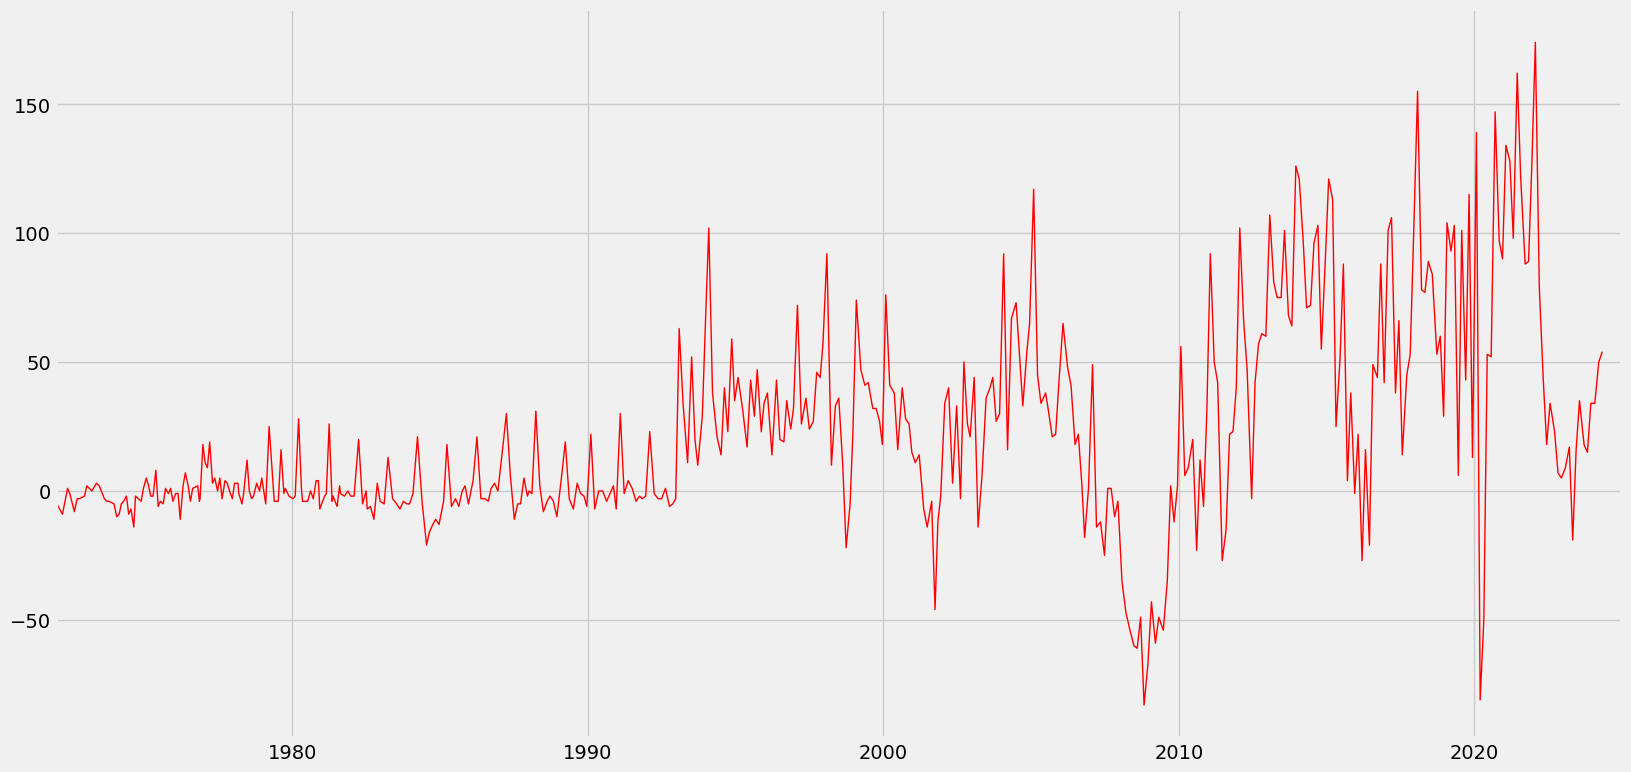

In [ ]:
NetSentiment = (Data['NPositiveWords'] - Data['NNegativeWords'])

fig, ax = plt.subplots()

ax.plot(Data.index, NetSentiment,
         c = 'red',
         linewidth= 1.0)

plt.title('',size = 'medium')

# format the ticks
# round to nearest years.
datemin = np.datetime64(Data.index[0], 'Y')
datemax = np.datetime64(Data.index[-1], 'Y') + np.timedelta64(1, 'Y')
ax.set_xlim(datemin, datemax)

# format the coords message box
ax.format_xdata = mdates.DateFormatter('%Y-%m-%d')
ax.grid(True)

plt.savefig('fomc_net_sentiment.png',dpi=60, bbox_inches = "tight")
files.download('fomc_net_sentiment.png');

plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

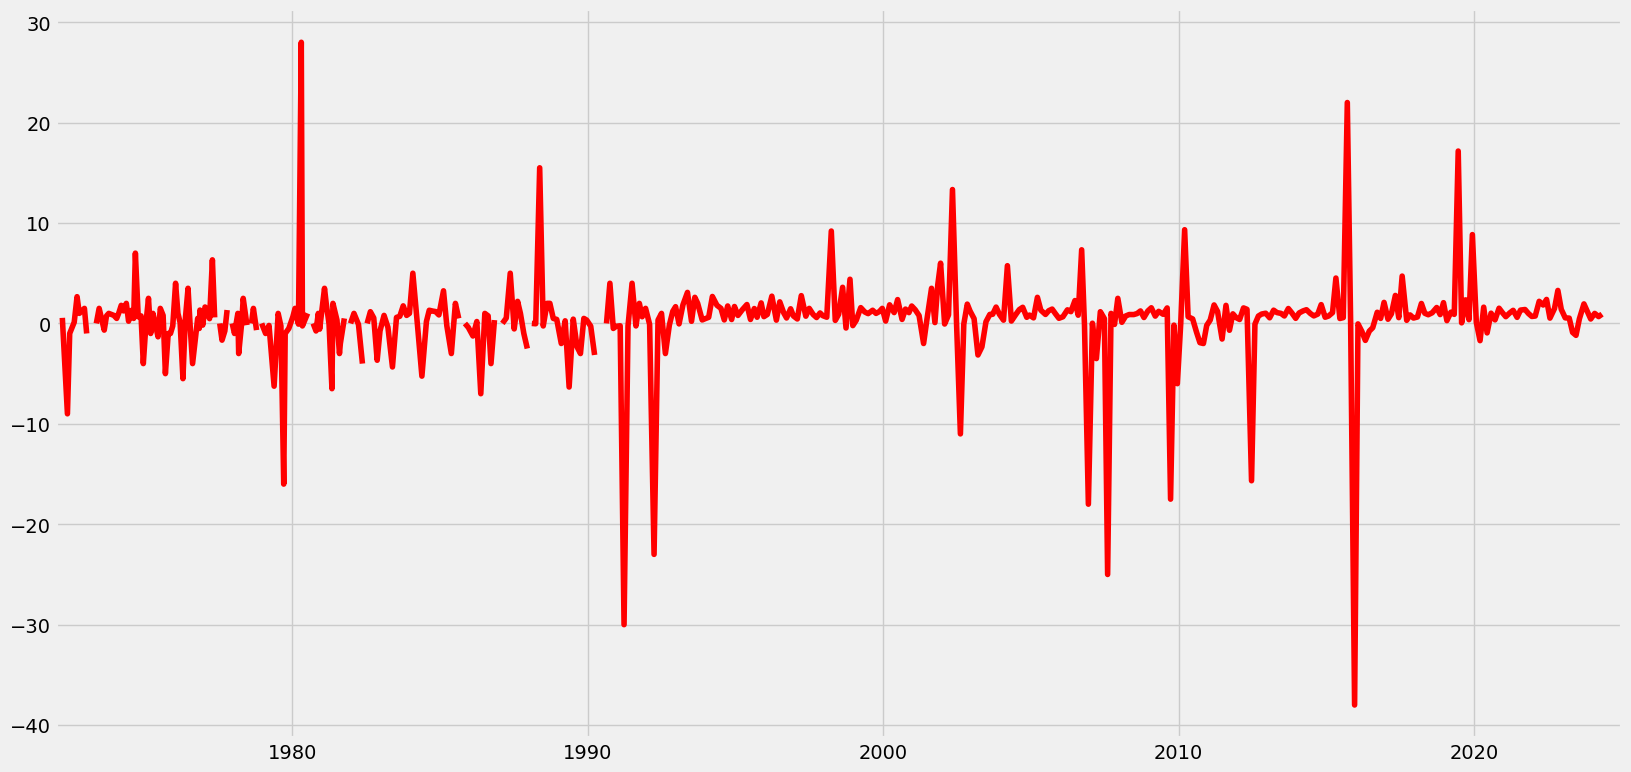

In [ ]:
firstderivative = (NetSentiment.shift(1) / NetSentiment)

fig, ax = plt.subplots()

ax.plot(Data.index, firstderivative,
         c = 'red')

plt.title('')

# format the ticks
# round to nearest years.
datemin = np.datetime64(Data.index[0], 'Y')
datemax = np.datetime64(Data.index[-1], 'Y') + np.timedelta64(1, 'Y')
ax.set_xlim(datemin, datemax)

# format the coords message box
ax.format_xdata = mdates.DateFormatter('%Y-%m-%d')
ax.grid(True)

plt.savefig('fomc_sentiment_chg.png',dpi=60, bbox_inches = "tight")
files.download('fomc_sentiment_chg.png');

plt.show()

In [ ]:
#Retrive historical price data for the SP500
from datetime import datetime, timedelta
ticker = '^GSPC'

window = 250
start = Data.index[0] - timedelta(days=window)
end = Data.index[-1]
market = yf.download(ticker, start=start, end=end, auto_adjust=False)

[*********************100%%**********************]  1 of 1 completed


In [ ]:
#Convert to the daily changes and smooth out data with a 250day trailing ma
market_norm = market['Adj Close']
# market_norm = market_norm.diff()
market_norm = market_norm.rolling(window=250).mean() #250day trailing average window
market_norm.dropna(inplace=True)

In [ ]:
#Need to fix the x axis to give both series the same length
resampled = market_norm.reindex(NetSentiment.index, method='ffill')

import warnings
pd.set_option('display.float_format', lambda x: '%.3f' % x)

df = pd.concat([NetSentiment,resampled], axis=1)
df.rename(columns={0: 'Sentiment','Adj Close':'S&P500'}, inplace=True)
df['S&P500'] = df['S&P500'].diff()
df = df.dropna(axis = 0, how ='any')
# df['S&P500']=df['S&P500'].fillna(0)
n_mos = df['S&P500'].shape[0]

try:
  return_per_period = (df['S&P500']+1).prod()**(1/n_mos) - 1
except:
  return_per_period = 0

df.head()

,Sentiment,S&P500
Date,,
1972-06-20,-1,0.674
1972-08-15,-8,1.640
1972-09-19,-3,1.023
1972-10-17,-3,0.874
1972-12-19,-2,3.374


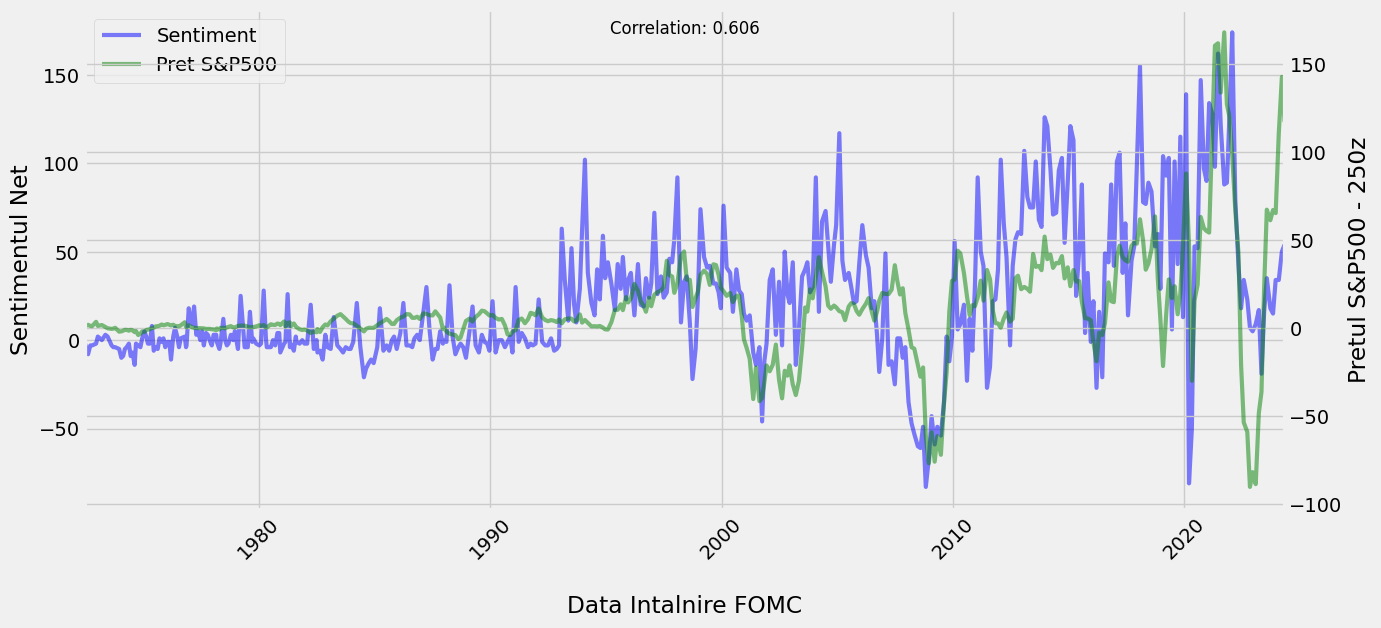

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Reset the index to use it as a column for plotting
df_reset = df.reset_index()

fig = plt.figure(figsize=(12, 5))
line_weight = 3
alpha = .5

ax1 = fig.add_axes([0, 0, 1, 1])
ax2 = ax1.twinx()

lns1 = ax1.plot(df_reset['Date'], df_reset['Sentiment'], color='blue', lw=line_weight, alpha=alpha, label='Sentiment')
lns2 = ax2.plot(df_reset['Date'], df_reset['S&P500'], color='green', lw=line_weight, alpha=alpha, label='Pret S&P500')

market_corr = df['S&P500'].corr(df['Sentiment'])

leg = lns1 + lns2
labs = [l.get_label() for l in leg]
ax1.legend(leg, labs, loc='best')

plt.title('', fontweight='bold', fontsize=18)
plt.suptitle('Correlation: {}'.format(round(market_corr, 3)), fontsize=12)

ax1.set(ylabel="Sentimentul Net")
ax2.set(ylabel="Pretul S&P500 - 250z")
ax1.set(xlabel="\nData Intalnire FOMC")

# Use AutoDateLocator and DateFormatter for x-axis
ax1.xaxis.set_major_locator(mdates.AutoDateLocator())
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

# Rotate date labels for better readability
plt.setp(ax1.xaxis.get_majorticklabels(), rotation=45)

# Set the limits for the x-axis
ax1.set_xlim(df_reset['Date'].min(), df_reset['Date'].max())

plt.savefig('sentiment_corr.png', dpi=60, bbox_inches="tight")
plt.show()


In [ ]:
# Displaying the structure of the DataFrame
print(df.info())

# Displaying the column names of the DataFrame
print(df.columns)


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 444 entries, 1972-06-20 to 2024-05-01
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Sentiment  444 non-null    int64  
 1   S&P500     444 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 10.4 KB
None
Index(['Sentiment', 'S&P500'], dtype='object')


In [ ]:
#Optimal mtry

In [ ]:
import pandas as pd
import numpy as np

# Create the 'conclusion' variable
df['Price_Next_Day'] = df['S&P500'].shift(-1)
df['conclusion'] = np.where(df['Price_Next_Day'] > df['S&P500'], 'buy', 'sell')

# Drop the last row since it will have NaN in 'Price_Next_Day'
df = df.dropna(subset=['Price_Next_Day'])

# Drop the 'Price_Next_Day' column as it's no longer needed
df = df.drop(columns=['Price_Next_Day'])


In [ ]:
from sklearn.model_selection import train_test_split

# Define the feature matrix X and target vector y
X = df[['Sentiment']]
y = df['conclusion']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV, cross_val_score
import pandas as pd
import numpy as np

# Define the feature matrix X and target vector y
X = df[['Sentiment']]
y = df['S&P500']

# Perform grid search to find the optimal mtry
param_grid = {'max_features': range(1, X.shape[1] + 1)}

grid_search = GridSearchCV(estimator=RandomForestRegressor(n_estimators=100, random_state=42),
                           param_grid=param_grid,
                           cv=10,
                           scoring='r2',
                           return_train_score=True)

grid_search.fit(X, y)

# Extract the results into a DataFrame
results = pd.DataFrame(grid_search.cv_results_)

# Print summary of the results
print("Random Forest")
print(f"{len(y)} samples")
print(f"{X.shape[1]} predictor")
print(f"Resampling: Cross-Validated (10 fold)\n")

sample_sizes = [len(results[f'split{i}_test_score']) for i in range(10)]
print(f"Summary of sample sizes: {', '.join(map(str, sample_sizes))}\n")
print("Resampling results across tuning parameters:\n")

print(results[['param_max_features', 'mean_test_score', 'std_test_score']])

print(f"\nAccuracy was used to select the optimal model using the largest value.\nThe final value used for the model was mtry = {grid_search.best_params_['max_features']}.\n")

optimal_mtry = grid_search.best_params_['max_features']


Random Forest
443 samples
1 predictor
Resampling: Cross-Validated (10 fold)

Summary of sample sizes: 1, 1, 1, 1, 1, 1, 1, 1, 1, 1

Resampling results across tuning parameters:

  param_max_features  mean_test_score  std_test_score
0                  1          -20.069          34.430

Accuracy was used to select the optimal model using the largest value.
The final value used for the model was mtry = 1.



In [ ]:
# Function to find optimal maxnodes with detailed output
def find_optimal_maxnodes(X, y, mtry):
    param_grid = {'max_leaf_nodes': range(2, 31)}

    grid_search = GridSearchCV(estimator=RandomForestRegressor(n_estimators=100, max_features=mtry, random_state=42),
                               param_grid=param_grid,
                               cv=10,
                               scoring='r2',
                               return_train_score=True)

    grid_search.fit(X, y)

    # Extract the results into a DataFrame
    results = pd.DataFrame(grid_search.cv_results_)

    # Print summary of the results
    print("Random Forest - maxnodes")
    print(f"{len(y)} samples")
    print(f"{X.shape[1]} predictor")
    print(f"Resampling: Cross-Validated (10 fold)\n")

    sample_sizes = [len(results[f'split{i}_test_score']) for i in range(10)]
    print(f"Summary of sample sizes: {', '.join(map(str, sample_sizes))}\n")
    print("Resampling results across tuning parameters:\n")

    print(results[['param_max_leaf_nodes', 'mean_test_score', 'std_test_score']])

    print(f"\nAccuracy was used to select the optimal model using the largest value.\nThe final value used for the model was maxnodes = {grid_search.best_params_['max_leaf_nodes']}.\n")

    return grid_search.best_params_['max_leaf_nodes']

optimal_maxnodes = find_optimal_maxnodes(X, y, optimal_mtry)


Random Forest - maxnodes
443 samples
1 predictor
Resampling: Cross-Validated (10 fold)

Summary of sample sizes: 29, 29, 29, 29, 29, 29, 29, 29, 29, 29

Resampling results across tuning parameters:

   param_max_leaf_nodes  mean_test_score  std_test_score
0                     2           -2.356           3.841
1                     3           -1.893           3.117
2                     4           -2.236           3.914
3                     5           -1.921           3.205
4                     6           -2.252           3.505
5                     7           -2.885           4.446
6                     8           -3.381           5.274
7                     9           -3.840           6.077
8                    10           -4.513           7.331
9                    11           -5.351           8.832
10                   12           -6.422          10.904
11                   13           -6.756          11.401
12                   14           -7.580          12.990
13 

In [ ]:
# Function to find optimal ntrees with detailed output
def find_optimal_ntrees(X, y, mtry, maxnodes):
    param_grid = {'n_estimators': [250, 300, 400, 500, 600, 800]}

    grid_search = GridSearchCV(estimator=RandomForestRegressor(max_features=mtry, max_leaf_nodes=maxnodes, random_state=42),
                               param_grid=param_grid,
                               cv=10,
                               scoring='r2',
                               return_train_score=True)

    grid_search.fit(X, y)

    # Extract the results into a DataFrame
    results = pd.DataFrame(grid_search.cv_results_)

    # Print summary of the results
    print("Random Forest - ntrees")
    print(f"{len(y)} samples")
    print(f"{X.shape[1]} predictor")
    print(f"Resampling: Cross-Validated (10 fold)\n")

    sample_sizes = [len(results[f'split{i}_test_score']) for i in range(10)]
    print(f"Summary of sample sizes: {', '.join(map(str, sample_sizes))}\n")
    print("Resampling results across tuning parameters:\n")

    print(results[['param_n_estimators', 'mean_test_score', 'std_test_score']])

    print(f"\nAccuracy was used to select the optimal model using the largest value.\nThe final value used for the model was ntrees = {grid_search.best_params_['n_estimators']}.\n")

    return grid_search.best_params_['n_estimators']

optimal_ntrees = find_optimal_ntrees(X, y, optimal_mtry, optimal_maxnodes)


Random Forest - ntrees
443 samples
1 predictor
Resampling: Cross-Validated (10 fold)

Summary of sample sizes: 6, 6, 6, 6, 6, 6, 6, 6, 6, 6

Resampling results across tuning parameters:

  param_n_estimators  mean_test_score  std_test_score
0                250           -2.036           3.496
1                300           -2.000           3.465
2                400           -2.072           3.597
3                500           -2.058           3.541
4                600           -2.121           3.664
5                800           -2.169           3.739

Accuracy was used to select the optimal model using the largest value.
The final value used for the model was ntrees = 300.



In [ ]:
# Function to find optimal nodesize with detailed output
def find_optimal_nodesize(X, y, mtry, maxnodes, ntrees):
    param_grid = {'min_samples_leaf': range(2, 31)}

    grid_search = GridSearchCV(estimator=RandomForestRegressor(n_estimators=ntrees, max_features=mtry, max_leaf_nodes=maxnodes, random_state=42),
                               param_grid=param_grid,
                               cv=10,
                               scoring='r2',
                               return_train_score=True)

    grid_search.fit(X, y)

    # Extract the results into a DataFrame
    results = pd.DataFrame(grid_search.cv_results_)

    # Print summary of the results
    print("Random Forest - nodesize")
    print(f"{len(y)} samples")
    print(f"{X.shape[1]} predictor")
    print(f"Resampling: Cross-Validated (10 fold)\n")

    sample_sizes = [len(results[f'split{i}_test_score']) for i in range(10)]
    print(f"Summary of sample sizes: {', '.join(map(str, sample_sizes))}\n")
    print("Resampling results across tuning parameters:\n")

    print(results[['param_min_samples_leaf', 'mean_test_score', 'std_test_score']])

    print(f"\nAccuracy was used to select the optimal model using the largest value.\nThe final value used for the model was nodesize = {grid_search.best_params_['min_samples_leaf']}.\n")

    return grid_search.best_params_['min_samples_leaf']

optimal_nodesize = find_optimal_nodesize(X, y, optimal_mtry, optimal_maxnodes, optimal_ntrees)


Random Forest - nodesize
443 samples
1 predictor
Resampling: Cross-Validated (10 fold)

Summary of sample sizes: 29, 29, 29, 29, 29, 29, 29, 29, 29, 29

Resampling results across tuning parameters:

   param_min_samples_leaf  mean_test_score  std_test_score
0                       2           -2.009           3.480
1                       3           -2.002           3.466
2                       4           -2.011           3.484
3                       5           -2.044           3.554
4                       6           -2.032           3.538
5                       7           -2.082           3.629
6                       8           -2.188           3.832
7                       9           -2.206           3.839
8                      10           -2.258           3.976
9                      11           -2.127           3.749
10                     12           -1.964           3.426
11                     13           -1.893           3.262
12                     14         

In [ ]:
# Print the optimal parameters
print(f'Optimal Model Parameters:')
print(f'mtry: {optimal_mtry}')
print(f'maxnodes: {optimal_maxnodes}')
print(f'ntrees: {optimal_ntrees}')
print(f'nodesize: {optimal_nodesize}')


Optimal Model Parameters:
mtry: 1
maxnodes: 3
ntrees: 300
nodesize: 15


In [ ]:
#Model train
from sklearn.ensemble import RandomForestClassifier

# Train the Random Forest model with the optimized parameters
final_model = RandomForestClassifier(n_estimators=300,
                                     max_features=1,
                                     max_leaf_nodes=3,
                                     min_samples_leaf=15,
                                     random_state=42)

final_model.fit(X_train, y_train)


RandomForestClassifier(max_features=1, max_leaf_nodes=3, min_samples_leaf=15,
                       n_estimators=300, random_state=42)

In [ ]:
import pandas as pd
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Predict on the test set
y_pred = final_model.predict(X_test)

# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix_df = pd.DataFrame(conf_matrix, index=['BUY', 'SELL'], columns=['BUY', 'SELL'])

# Calculate the class error
conf_matrix_df['class.error'] = [1 - conf_matrix_df.iloc[i, i] / conf_matrix_df.iloc[i].sum() for i in range(len(conf_matrix_df))]

# Print the formatted confusion matrix
print("Confusion Matrix:")
print(conf_matrix_df)

# Print the classification report for additional metrics
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Print the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")


Confusion Matrix:
      BUY  SELL  class.error
BUY    10    31        0.756
SELL   17    31        0.354

Classification Report:
              precision    recall  f1-score   support

         buy       0.37      0.24      0.29        41
        sell       0.50      0.65      0.56        48

    accuracy                           0.46        89
   macro avg       0.44      0.44      0.43        89
weighted avg       0.44      0.46      0.44        89

Accuracy: 0.4607


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score

# Predict on the test set
y_pred = final_model.predict(X_test)
y_proba = final_model.predict_proba(X_test)[:, 1]

# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix_df = pd.DataFrame(conf_matrix, index=['BUY', 'SELL'], columns=['BUY', 'SELL'])

# Calculate the class error
conf_matrix_df['class.error'] = [1 - conf_matrix_df.iloc[i, i] / conf_matrix_df.iloc[i].sum() for i in range(len(conf_matrix_df))]

# Print the formatted confusion matrix
print("Confusion Matrix:")
print(conf_matrix_df)

# Print the classification report for additional metrics
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Print the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Calculate and print the AUC-ROC score
auc_roc = roc_auc_score(y_test.map({'buy': 1, 'sell': 0}), y_proba)
print(f"AUC-ROC Score: {auc_roc:.4f}")


Confusion Matrix:
      BUY  SELL  class.error
BUY    10    31        0.756
SELL   17    31        0.354

Classification Report:
              precision    recall  f1-score   support

         buy       0.37      0.24      0.29        41
        sell       0.50      0.65      0.56        48

    accuracy                           0.46        89
   macro avg       0.44      0.44      0.43        89
weighted avg       0.44      0.46      0.44        89

Accuracy: 0.4607
AUC-ROC Score: 0.6230


In [ ]:
# Additional feature engineering example
df['Previous_Sentiment'] = df['Sentiment'].shift(1)
df['Sentiment_Change'] = df['Sentiment'] - df['Previous_Sentiment']
df = df.dropna()

# Redefine feature matrix X with additional features
X = df[['Sentiment', 'Previous_Sentiment', 'Sentiment_Change']]
y = df['conclusion']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Random Forest model with additional features
final_model = RandomForestClassifier(n_estimators=300,
                                     max_features=1,
                                     max_leaf_nodes=3,
                                     min_samples_leaf=15,
                                     random_state=42)

final_model.fit(X_train, y_train)

# Predict on the test set
y_pred = final_model.predict(X_test)

# Print the classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Print the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix_df = pd.DataFrame(conf_matrix, index=['BUY', 'SELL'], columns=['BUY', 'SELL'])
conf_matrix_df['class.error'] = [1 - conf_matrix_df.iloc[i, i] / conf_matrix_df.iloc[i].sum() for i in range(len(conf_matrix_df))]
print("Confusion Matrix:")
print(conf_matrix_df)

# Print the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Calculate and print the AUC-ROC score
y_proba = final_model.predict_proba(X_test)[:, 1]
auc_roc = roc_auc_score(y_test.map({'buy': 1, 'sell': 0}), y_proba)
print(f"AUC-ROC Score: {auc_roc:.4f}")


Classification Report:
              precision    recall  f1-score   support

         buy       0.44      0.18      0.25        45
        sell       0.48      0.77      0.59        44

    accuracy                           0.47        89
   macro avg       0.46      0.48      0.42        89
weighted avg       0.46      0.47      0.42        89

Confusion Matrix:
      BUY  SELL  class.error
BUY     8    37        0.822
SELL   10    34        0.227
Accuracy: 0.4719
AUC-ROC Score: 0.5386


In [ ]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score

# Feature Engineering
df['Previous_Sentiment'] = df['Sentiment'].shift(1)
df['Sentiment_Change'] = df['Sentiment'] - df['Previous_Sentiment']
df['5_day_MA'] = df['S&P500'].rolling(window=5).mean()
df['10_day_MA'] = df['S&P500'].rolling(window=10).mean()
df['Volatility'] = df['S&P500'].rolling(window=5).std()

# Drop NaN values created by rolling calculations
df = df.dropna()

# Define feature matrix X with additional features
X = df[['Sentiment', 'Previous_Sentiment', 'Sentiment_Change', '5_day_MA', '10_day_MA', 'Volatility']]
y = df['conclusion']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define parameter grid for GridSearchCV
param_grid = {
 'n_estimators': [100, 200, 300],
 'max_features': [1, 2, 3],
 'max_leaf_nodes': [3, 5, 10],
 'min_samples_leaf': [1, 5, 10]
}

# Perform grid search
grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42),
                        param_grid=param_grid,
                        cv=10,
                        scoring='accuracy',
                        return_train_score=True,
                        n_jobs=-1)

grid_search.fit(X_train, y_train)

# Extract the best parameters
best_params = grid_search.best_params_

# Train the Random Forest model with the optimized parameters
final_model = RandomForestClassifier(n_estimators=best_params['n_estimators'],
                                  max_features=best_params['max_features'],
                                  max_leaf_nodes=best_params['max_leaf_nodes'],
                                  min_samples_leaf=best_params['min_samples_leaf'],
                                  random_state=42)

final_model.fit(X_train, y_train)

# Predict on the test set
y_pred = final_model.predict(X_test)

# Print the classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Generate and print the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix_df = pd.DataFrame(conf_matrix, index=['BUY', 'SELL'], columns=['BUY', 'SELL'])
conf_matrix_df['class.error'] = [1 - conf_matrix_df.iloc[i, i] / conf_matrix_df.iloc[i].sum() for i in range(len(conf_matrix_df))]
print("Confusion Matrix:")
print(conf_matrix_df)

# Print the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Calculate and print the AUC-ROC score
y_proba = final_model.predict_proba(X_test)[:, 1]
auc_roc = roc_auc_score(y_test.map({'buy': 1, 'sell': 0}), y_proba)
print(f"AUC-ROC Score: {auc_roc:.4f}")

Classification Report:
              precision    recall  f1-score   support

         buy       0.72      0.40      0.51        45
        sell       0.56      0.83      0.67        42

    accuracy                           0.61        87
   macro avg       0.64      0.62      0.59        87
weighted avg       0.64      0.61      0.59        87

Confusion Matrix:
      BUY  SELL  class.error
BUY    18    27        0.600
SELL    7    35        0.167
Accuracy: 0.6092
AUC-ROC Score: 0.3788


In [ ]:
#Addressing Class Imbalance with SMOTE

In [ ]:
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score
import pandas as pd

# Define feature matrix X with additional features
X = df[['Sentiment', 'Previous_Sentiment', 'Sentiment_Change', '5_day_MA', '10_day_MA', 'Volatility']]
y = df['conclusion']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Applying SMOTE to balance the classes and training the Random Forest model
smote = SMOTE(random_state=42)

# Define the pipeline
pipeline = Pipeline([
    ('smote', smote),
    ('rf', RandomForestClassifier(n_estimators=300, max_features=1, max_leaf_nodes=3, min_samples_leaf=15, random_state=42))
])

# Fit the model
pipeline.fit(X_train, y_train)

# Predict on the test set
y_pred = pipeline.predict(X_test)

# Print the classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Generate and print the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix_df = pd.DataFrame(conf_matrix, index=['BUY', 'SELL'], columns=['BUY', 'SELL'])
conf_matrix_df['class.error'] = [1 - conf_matrix_df.iloc[i, i] / conf_matrix_df.iloc[i].sum() for i in range(len(conf_matrix_df))]
print("Confusion Matrix:")
print(conf_matrix_df)

# Print the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Calculate and print the AUC-ROC score
y_proba = pipeline.predict_proba(X_test)[:, 1]
auc_roc = roc_auc_score(y_test.map({'buy': 1, 'sell': 0}), y_proba)
print(f"AUC-ROC Score: {auc_roc:.4f}")


Classification Report:
              precision    recall  f1-score   support

         buy       0.69      0.53      0.60        45
        sell       0.60      0.74      0.66        42

    accuracy                           0.63        87
   macro avg       0.64      0.64      0.63        87
weighted avg       0.64      0.63      0.63        87

Confusion Matrix:
      BUY  SELL  class.error
BUY    24    21        0.467
SELL   11    31        0.262
Accuracy: 0.6322
AUC-ROC Score: 0.3730
